In [ ]:
# Second try??

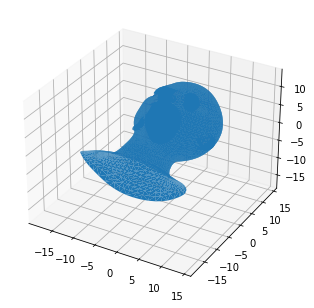

In [1]:
# You can load meshes as stl file using numpy and plot with matplotlib...

import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
ID_0_mesh = mesh.Mesh.from_file('identity000.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(ID_0_mesh.vectors))

# Auto scale to the mesh size
scale = ID_0_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [2]:
# Target data -- from Resources
# The identity modes matrix is the 100 face scans from the ICT Facekit, which each have 3D meshses of 6706 vertices
ID_modes = np.load('idendity_modes.npy')
print(np.shape(ID_modes))
print(ID_modes.dtype)
# The mean face resulting from those face sets is one narrow face area 3D mesh with 6706 vertices
mean_ID = np.load('mean.npy')
print(np.shape(mean_ID))   
print(mean_ID.dtype)

(3, 6706, 100)
float64
(3, 6706)
float64


In [3]:
def get_narrow_face_vector(file_name):
    vertices = []

    f = open(file_name, 'r')
    for line in f:
        data = line.split()
        if data:
            if data[0] == 'v':
                data = data[1:]
                for element in data:
                    vertices.append(float(element))
    
    narrow_face_vertices = vertices[:20118]
    shape_vector = np.array(narrow_face_vertices, dtype='float64')
    return shape_vector.reshape(20118, 1)

In [4]:
ID_0_test_vector = get_narrow_face_vector('identity000.obj')
print(ID_0_test_vector.shape)

(20118, 1)


In [5]:
import os 
def get_all_faces():
    all_face_vectors = []
    
    directory = r'C:\\Users\\judya\\AIF\\ICT-FaceKit\\FaceXModel\\IDs'
    for filename in os.listdir(directory):
        if filename.endswith(".obj"):
            vertices = []
            f = open(filename, 'r')
            for line in f:
                data = line.split()
                if data:
                    if data[0] == 'v':
                        data = data[1:]
                        for element in data:
                            vertices.append(float(element))
            narrow_face_vertices = vertices[:20118]
            all_face_vectors.append(narrow_face_vertices)
    
    return np.array(all_face_vectors, dtype='float64')

![title](shapeoffacevectors.png)


![title](pca3dmm.png)

In [6]:
dataset = get_all_faces()
dataset.shape

(100, 20118)

In [19]:
# NUMPY PCA, each step...

# calculate the mean of each column, 
# with the dataset transposed so that each column is an x, y, or z value
# so that you get the mean of every point
column_mean = np.mean(dataset.T, axis=1)
column_mean.shape

(20118,)

In [20]:
# center columns by subtracting column means from each point in each face
center = dataset - column_mean
center.shape

(100, 20118)

In [21]:
# calculate covariance matrix of centered matrix
covariance_matrix = np.cov(center.T)
covariance_matrix.shape

(20118, 20118)

In [ ]:
#eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(covariance_matrix)
print(values)
print(vectors)

In [ ]:
# #project data
# PrincipalComponents = vectors.T.dot(center.T)
# print(PrincipalComponents.T)
# #np.shape(PrincipalComponents.T)